# Multiple Linear Regression

We will train multiple linear regression model to understand the **correlations** between the features (or independent varialbles) 'R&D spend', 'Administraion spend', 'Marketing spend', State and the dependent variable vector 'Profit', of 50 startups. So, each row correspond to data of a startup. Therefore if we can manage to train the ML model that can understand well these correaltions, for a new startup we can deploy the ML model on the features to predict the profit of this new startup.

Looking at the dataset, we see there are total 4 features, 3 numerical features: 'R&D spend', 'Administraion spend', 'Marketing spend' and 1 categorical feature: 'State'. Also there are no missing values in any of these columns just by eye-looking.

The 'State' column is categorical and there is no order relationship among the unique values of the 'State' column. So, we have to apply **One Hot Encoding** to the 'State' column.

## Importing the libraries

First step is the data preprocessing phase.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [86]:
dataset = pd.read_csv('50_Startups.csv')
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [87]:
print(dataset.shape)

# Total 50 rows and 5 columns.

(50, 5)


In [88]:
print(dataset.isnull().sum())

# No missing values in any of the columns.

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [89]:
print(dataset.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [90]:
# Matrix of features, by taking first 4 coulmns and excluding the 'Profit' column.

X = dataset.iloc[:, :-1].values   # Extract all the rows of all the columns, except the last column. We extract only the values and not the column names. This is the matrix of features.
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [91]:
# Independent variable vector, the 'Profit' column.

y = dataset.iloc[:, -1].values   # Extract all the rows of the last column. We extract only the values and not the column names. This is the independent variable vector.
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

Now we will apply One Hot Encoding to the 'State' column to encode each of the category into a vector.

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')   # The index of the State column is 3.
X = np.array(ct.fit_transform(X))

In [93]:
print(X)

# After applying OneHotEncoding, the 'State' column has been replaced by 3 new columns which have numerical values. Dummy variables are always
# created in the first few columns. Also these new columns is placed at the begining, instead of at the actual position of the 'State' column.
# New York is encoded as vector (0, 0, 1), California is encoded as the vector (1, 0, 0) and Florida is encoded as the vector (0, 1, 0).

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

We **don't have to apply feature scaling in the multiple linear regression (MLR)** model. In MLR, the coefficients $b_1, b_2, ..., b_N$ are multiplied with the corresponding independent variables or features $X_1, X_2, ..., X_N$. Therefore it does not matter whether some features have higher values, because the corresponding coefficients will compensate to put everything on the same scale. So, in MLR, there is no need of applying feature scaling.

**Question:** Do we need to check the assumptions of linear regression?

The answer is absolutely not. When you have a new dataset, and you want to experiment with some ML models to figure out which one leads to the highest accuracy, even if the dataset does not have the linearity, you can still try a MLR on it. If the dataset does not have the linear relationships, the MLR will simply perform poorly, with accuracy lower than the accuracies of the other ML Models. So, in that case just do not choose MLR model. So, checking of linear regression assumptions is just waste of time.

The teachers of this course will show how we can efficiently try each of the models on our dataset and select which model has the highest accuracy. This will come under model selection. Genrally, we have to check several ML models on our dataset and select the best one.

**Question:** Do we have to do something to avoid the dummy variable trap?

The answer is NO, because the MLR class that we will import, which will build the MLR model and train it (as a class can do several tasks like building the model and training it), will automatically avoid the dummy variable trap. Here there are 3 dummy variables (the 3 binary columns encoded from the 'State' column), one of which is redundant as explained earlier. The class will take care of dummy variable trap and we don't have to remove one of the dummy variable columns.

**Question:** Do we have to work on the features to select the best features? Do we have to deploy the backward elimination technique in order to select the features that have the highest P-values and that are the most statistically significant?

The answer is No. The same reason as above. The class will automatically identify the best features, having the highest P-values or that are the most statistically significant.

## Splitting the dataset into the Training set and Test set

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)   # 80% data into training set and 20% data into test set. random_state = 0 is used to reproduce the result.

In [95]:
print(X_train)
print(X_train.shape)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

In [96]:
print(X_test)
print(X_test.shape)

[[0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]
(10, 6)


In [97]:
print(y_train)
print(y_train.shape)

[ 96778.92  96479.51 105733.54  96712.8  124266.9  155752.6  132602.65
  64926.08  35673.41 101004.64 129917.04  99937.59  97427.84 126992.93
  71498.49 118474.03  69758.98 152211.77 134307.35 107404.34 156991.12
 125370.37  78239.91  14681.4  191792.06 141585.52  89949.14 108552.04
 156122.51 108733.99  90708.19 111313.02 122776.86 149759.96  81005.76
  49490.75 182901.99 192261.83  42559.73  65200.33]
(40,)


In [98]:
print(y_test)
print(y_test.shape)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
(10,)


The multiple linear regression (MLR) is exactly same as the simple linear regression (SLR) except that the MLR has several features. The same class we used in SLR, can also do MLR by automatically identifying several features. Then the MLR model will be trained to understand the correlations between the features and the dependent variable vector on the training set. The class will take care of the dummy variable trap and of the statistically significant features.

## Training the Multiple Linear Regression model on the Training set

In [99]:
from sklearn.linear_model import LinearRegression   # Importing the LinearRegression class from the sklearn.linear_model module.
regressor = LinearRegression()   # Object of the LinearRegression class. This is the MLR model. In this line we are just building the MLR model and we are not training the model on our dataset. Here we are using the default parameters and the parameter tuning will be taught later.
regressor.fit(X_train, y_train)   # This line of code will train the MLR Model on the training set, using the fit() function of the LinearRegression class.

LinearRegression()

In [100]:
trained_model = regressor.fit(X_train, y_train)
print(trained_model)
print(type(trained_model))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


## Predicting the Training set results

In [101]:
# Predict the dependent variable vector or profit by the above MLR model by taking the featurs of the training set X_train.
# For this we use predict() fuinction.

y_pred_train = trained_model.predict(X_train)
print(y_pred_train)

# y_pred_train is the array of predicted values of the dependent variable vector (Profit here) by the MLR model, on the training set.

[ 95764.42320496  89164.62849778 109506.72329085  91366.2188941
 127111.48666647 159019.04337115 148905.98812541  48179.60744027
  45374.34722506 102951.95967979 145449.631784    96684.71387297
  97535.35761938 116571.15139254  69421.13311311 116212.62095134
  60736.5326761  152787.95464279 127413.0337311  102210.16391826
 161822.72264072 131583.61511492  75019.09161336  48054.91969392
 189547.28196895 127528.92248423  85540.50570954 111255.82514049
 156191.10124354 108464.25100332  75306.81185049 119915.38726756
 115144.58914953 152688.9067796   81513.47163491  57298.28613019
 172852.2833664  192919.57537466  47007.62737748  65835.99435875]


## Visualizing the Training set results

As there are several features in the MLR, we can not plot dependent variable vs a single feature. Since there are 4 features, we need a 5D graph which is not possible to visualize. Instead, we will plot the actual values vs predicted values of the dependent variable vector.

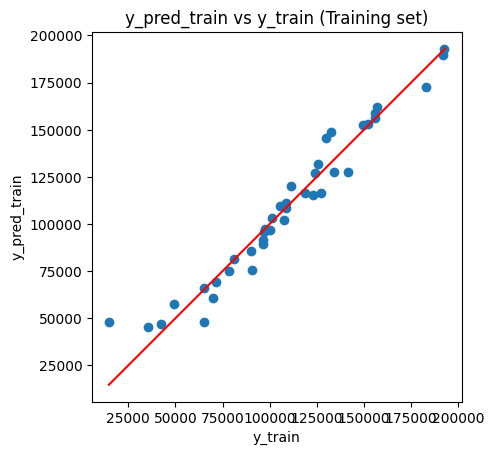

In [102]:
# We compare the predicted values (y_pred_train) and actual values (y_train) of the dependent variable vector or profit,
# of the training set, in a scatter plot. We also draw a straight line of perfect linear regression which is the line
# when the model predicts exactly the actual values i.e., when the model is 100% perfect. This is represented by solid red line.

import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)   # Scatter plot of actual and predicted values of the dependent variable vector or profit.

# Setting the range to draw the 100% perfect linear regression line. p1 and p2 will take the minimum and maximum values, respectuvely, from the y_train and y_pred_train.
p1 = int(min(min(y_train), min(y_pred_train)))
# print(p1)

p2 = int(max(max(y_train), max(y_pred_train)))
# print(p2)


plt.plot(range(p1, p2), range(p1, p2), color = 'r')   # We draw a straight line through (0, 0) and (my_range, my_range). This is the 100% perfect linear regression line i.e., when the predicted values exactly match with the actual values i.e., when y_pred_train = y_train.

plt.gca().set_aspect('equal')   # Setting the equal range for the x-axis and y-axis.
plt.title('y_pred_train vs y_train (Training set)')
plt.xlabel('y_train')
plt.ylabel('y_pred_train')
plt.show()

# The more the data points of the scatter plot y_pred_train vs y_train is closer to the red line (100% perfect regression line),
# the better is the model for the data i.e., predicted and actual values are very close to each other.
# Here, we see a very good result as the most of the data points are very close to the red line.

## Predicting the Test set results

Now we will check the performance of the model on the new observations i.e., on the test set.

In [103]:
y_pred_test = trained_model.predict(X_test)
print(y_pred_test)

# y_pred_test is the array of values predicted by the MLR model on the test set or new observations.

[103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


## Visualizing the Test set results

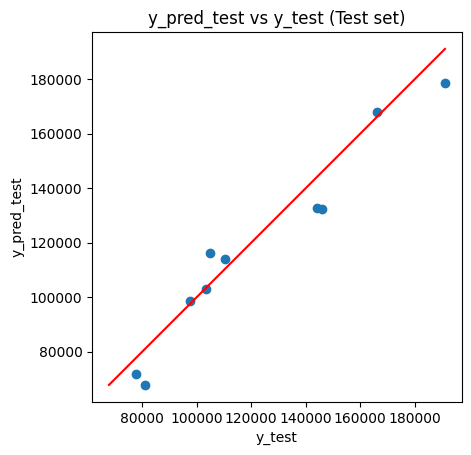

In [104]:
plt.scatter(y_test, y_pred_test)

# Setting the range to draw the 100% perfect linear regression line. p1 and p2 will take the minimum and maximum values, respectuvely, from the y_test and y_pred_test.
p1 = int(min(min(y_test), min(y_pred_test)))
# print(p1)

p2 = int(max(max(y_test), max(y_pred_test)))
# print(p2)

plt.plot(range(p1, p2), range(p1, p2), color = 'red')

plt.gca().set_aspect('equal')   # Setting the equal range for the x-axis and y-axis.
plt.title('y_pred_test vs y_test (Test set)')
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.show()

plt.show()

# We see that the data points are close to the solid red line i.e., the predicted values are close to the actual values,
# on the test set or new observations also. SO, MLR is well adapted to this dataset.

In [107]:
# In the following we just show the two vectors y_test and y_pred_test vertically, instead of default horizontal arrays shown above.

y_pred = regressor.predict(X_test)   # vector of the predicted profit on the test set.
np.set_printoptions(precision=2)   # to print the results only upto 2 decimel places.

# First reshape the vectors horizontally and then concatenate them horizontally.
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [108]:
print(trained_model.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [110]:
print(trained_model.coef_)
print(trained_model.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.